In [1]:
#en 2D reseau triangle graphène plus proche voisin

import matplotlib.pyplot as plt
import numpy as np

def Hprochevoisin(nx=4,ny=4,t=1,diagonalize = True):

    n = nx*ny

    a = np.arange(n)

    nei=np.zeros( ( n , 4) , dtype = 'int')

    vup = (a+nx)%n
    vgauche = (a%nx - 1 + nx)%nx + (a/nx)*nx
    vdroite = (a%nx + 1)%nx + (a/nx)*nx 
    vdown = (a-nx+n)%n

    nei[ : , 0 ] = vdroite
    nei[ : , 1 ] = vup
    nei[ : , 2 ] = vgauche
    nei[ : , 3 ] = vdown

    #print nei
    
    print(nei[:,2])
    # On ajoute le terme de hopping

    H = np.zeros((2*n,2*n),dtype='complex')


    for i in a:
        H[i,i+n]+=t
        H[i+n,i]+=t
        H[i,nei[i,2]+n]+=t
        H[nei[i,2]+n,i]+=t
        H[i,nei[nei[i,2],1]+n]+=t
        H[nei[nei[i,2],1]+n,i]+=t

    #print(H)

    if diagonalize == True:
    
        # diagonalisation

        einval,eingvect = np.linalg.eigh(H)

         #print(np.sort(einval))
    else:
        
        einval = 0
        eingvect = 0

    
    
    return H,einval,eingvect


In [7]:
# Pour le terme de couplage spin orbite


def Hspinorbite(nx,ny,g,diagonalize=True):
    
    n = nx*ny
    
    a = np.arange(n)
    print(a)
    nei=np.zeros( ( n , 4) , dtype = 'int')
    
    vup = (a+nx)%n
    vgauche = (a%nx - 1 + nx)%nx + (a/nx)*nx
    vdroite = (a%nx + 1)%nx + (a/nx)*nx 
    vdown = (a-nx+n)%n
    
    nei[ : , 0 ] = vdroite
    nei[ : , 1 ] = vup
    nei[ : , 2 ] = vgauche
    nei[ : , 3 ] = vdown
 


    #print nei
    
    # On ajoute le terme de hopping
    
    H = np.zeros((2*n,2*n),dtype='complex')
    
    
    for i in a:
        
        #v1
        H[i,nei[nei[i,2],1]]+=+g
        H[i+n,nei[nei[i,2],1]+n]+=-g
        
        #v2 droite
        H[i,nei[i,0]]+=+g
        H[i+n,nei[i,0]+n]+=-g
         
        #V3 down
        H[i,nei[i,3]]+=+g
        H[i+n, nei[i,3]+n]+=-g
        
        #V4
        H[i,nei[nei[i,3],0]]+=-g
        H[i+n,nei[nei[i,3],0]+n]+=+g
        
        #v5 gauche
        H[i,nei[i,2]]+=-g
        H[i+n,nei[i,2]+n]+=+g
        
        #v6 up
        H[i,nei[i,1]]+=-g
        H[i+n,nei[i,1]+n]+=+g
        
    #H=H*1.0j
    #print H
        
        
    if diagonalize == True:
    
        # diagonalisation

        einval,eingvect = np.linalg.eig(H)

         #print(np.sort(einval))
    else:
        
        einval = 0
        eingvect = 0
    
    return H,einval,eingvect

#H,einval,eingvect=Hspinorbite(3,3,1)
#print(einval)

[ 11   0   1   2   3   4   5   6   7   8   9  10  23  12  13  14  15  16
  17  18  19  20  21  22  35  24  25  26  27  28  29  30  31  32  33  34
  47  36  37  38  39  40  41  42  43  44  45  46  59  48  49  50  51  52
  53  54  55  56  57  58  71  60  61  62  63  64  65  66  67  68  69  70
  83  72  73  74  75  76  77  78  79  80  81  82  95  84  85  86  87  88
  89  90  91  92  93  94 107  96  97  98  99 100 101 102 103 104 105 106
 119 108 109 110 111 112 113 114 115 116 117 118 131 120 121 122 123 124
 125 126 127 128 129 130 143 132 133 134 135 136 137 138 139 140 141 142]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 1

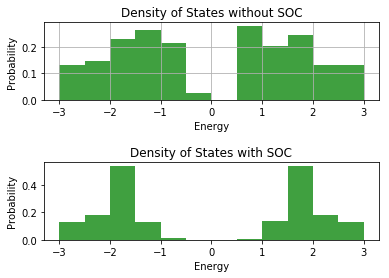

1.0


In [35]:

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
#import totoSOC as SOC
from matplotlib.backends.backend_pdf import PdfPages

nx = 12
ny = nx
t=1.0 # 1st neig. hopping
f = 0.4*1j # a proportionality factor for the 2nd neigh. hopping

# Calcul du Hamiltonian avec les premiéres voisins

H,einval,eingvect = Hprochevoisin(nx,ny,t,diagonalize=True)

#print(H)
#print(einval)

# Calcul du terme de couplage spin orbite 

#HSOC,einvalSOC,eingvectSOC = SOC.Hspinorbite(nx,ny,t*1*1j)

HSOC,einvalSOC,eingvectSOC = Hspinorbite(nx,ny,t*f,diagonalize=True)

#print HSOC


# Calcul du Hamiltonian totale

Htot = H + HSOC

#Diagonalisation

einvaltotal,eingvecttotal = np.linalg.eigh(Htot)

# the histogram of the data : density of states 

nbins = nx

x_nSoc = einval

x_Soc = einvalSOC

x_Total = einvaltotal

plt.figure(1)
plt.subplot(211)
n_, bins_, patches_ = plt.hist(x_nSoc, nbins , normed=1, facecolor='green', alpha=0.75)

plt.ylabel('Probability')
plt.title('Density of States without SOC')
plt.xlabel('Energy')
#plt.axis([x_nSoc.min()-1, x_nSoc.max()+1 , 0, 0.5 ])
plt.grid(True)


#plt.subplot(312)
#n, bins, patches = plt.hist(x_Soc, nbins , normed=1, facecolor='green', alpha=0.75)

#plt.ylabel('Probability')
#plt.title('Densite des etats SOC')
#plt.xlabel('Energie')
#plt.axis([x_Soc.min()-1, x_Soc.max()+1 , 0, 0.5 ])


plt.subplot(212)
n, bins, patches = plt.hist(x_Total, nbins , normed=1, facecolor='green', alpha=0.75)

plt.ylabel('Probability')
plt.title('Density of States with SOC')
plt.xlabel('Energy')
#plt.axis([x_Total.min()-1, x_Total.max()+1 , 0, 0.5 ])
plt.subplots_adjust(hspace=0.8, wspace=0.4)

plt.savefig("DOSNum.pdf", bbox_inches='tight')

plt.show()
print(np.min(np.absolute(einvaltotal)))

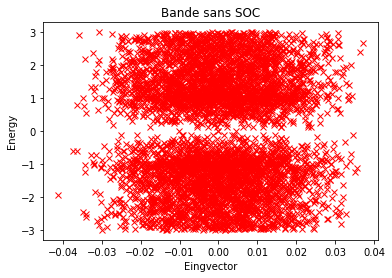

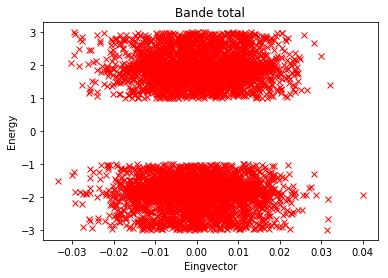

In [16]:


plt.figure(2)

plt.plot(eingvect.diagonal(),einval,'rx')
plt.ylabel('Energy')
plt.title('Bande sans SOC')
plt.xlabel('Eingvector')
plt.savefig("Eingvector.pdf", bbox_inches='tight')
plt.show()

plt.figure(3)

plt.plot(eingvecttotal.diagonal(),einvaltotal,'rx')
plt.ylabel('Energy')
plt.title('Bande total')
plt.xlabel('Eingvector')

plt.savefig("EingvectorSOC.pdf", bbox_inches='tight')
plt.show()



In [10]:

def findChern(eingvectors):

    chern = 0

    for l in range(np.shape(eingvectors)[1]/4):

        
        # On defini les vecteurs k, k+1, k+1+2,k+2. On peut les définirs
        # de cette façon à cause de l'invariance de jauge ? 
        p1 = (int(l) + 3*int(l))
        p2 = (int(l) + 3*int(l) + 1)
        p3 = (int(l) + 3*int(l) + 2)
        p4 = (int(l) + 3*int(l) + 3)
        
        U_12 = 0.0
        U_23 = 0.0
        U_34 = 0.0
        U_41 = 0.0

        # On les défini autrement
        #p1b = (int(l) + 3*int(l))%len(eingvectors)
        #p2b = (int(l) + 3*int(l) + 1)%len(eingvectors)
        #p3b = (int(l) + 3*int(l) + len(eingvectors) -1)%len(eingvectors)
        #p4b = (int(l) + 3*int(l) + len(eingvectors))%len(eingvectors)
    
        #p1 = p1b
        #P2 = p2b
        #P3 = p3b
        #P4 = p4b
    
        # On calcule la difference de phase obtenu aprés translation de un position 
        # a l'autre.
    
        #U_12 = np.dot(np.conj(eingvectors[:,p1]),eingvectors[:,p2])
        #U_12 = U_12/np.absolute(U_12) 
        #U_23 = np.dot(np.conj(eingvectors[:,p2]),eingvectors[:,p3])
        #U_23 = U_23/np.absolute(U_23)     
        #U_34 = np.dot(np.conj(eingvectors[:,p3]),eingvectors[:,p4])
        #U_34 = U_34/np.absolute(U_34) 
        #U_41 = np.dot(np.conj(eingvectors[:,p4]),eingvectors[:,p1])
        #U_41 = U_41/np.absolute(U_41) 
    
        # On calcul le flux de Berry 
        #F12 = np.log(U_12*U_23*U_34*U_41)
        
        
        U_12 = np.dot(np.conj(eingvectors[:,p1]),eingvectors[:,p2])
        U_12 = U_12/np.absolute(U_12) 
        U_23 = np.dot(np.conj(eingvectors[:,p2]),eingvectors[:,p3])
        U_23 = U_23/np.absolute(U_23)     
        U_43 = np.dot(np.conj(eingvectors[:,p4]),eingvectors[:,p3])
        U_43 = U_43/np.absolute(U_43) 
        U_14 = np.dot(np.conj(eingvectors[:,p1]),eingvectors[:,p4])
        U_14 = U_14/np.absolute(U_14) 
    
        # On calcul le flux de Berry 
        
        F12 = np.log(U_12*U_23*(U_43**(-1))*(U_14**(-1)))
      
        if np.isnan(F12) == False:
            chern += F12/(2.0*np.pi*1.0j)
    return chern

In [30]:
# Find the positions of the values corresponding to each band ( above an bellow E = 0)
posPos =  np.argwhere(np.sign(einvaltotal) > 0)
posNeg = np.argwhere(np.sign(einvaltotal) < 0)
                  
eingvecttotal_pos = eingvecttotal[:,np.transpose(posPos)[0,:]]

eingvecttotal_neg = eingvecttotal[:,np.transpose(posNeg)[0,:]]

chern_pos = findChern(eingvecttotal_pos)
chern_neg = findChern(eingvecttotal_neg)
chern = findChern(eingvecttotal)

print(chern_neg)
print(chern_pos)
print(chern)

(-0.448009447595-3.95829825251e-16j)
(-0.86676055985+2.62536020593e-16j)
(0.0837932067193+4.16346738525e-16j)


/home/lsneto/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in cdouble_scalars
/home/lsneto/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in cdouble_scalars
/home/lsneto/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in cdouble_scalars
/home/lsneto/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in cdouble_scalars


In [24]:
print(np.min(np.absolute(einvaltotal)))


0.259807621135
